In [9]:
import time
import matplotlib.pyplot as plt
import sys
sys.path.append('../functions')
from barcodes import get_data, interpolate, ripser_barcode
from landscapes import persistence_landscape, plot_pl, lp_distance_matrix, linf_distance_matrix
sys.path.append('../classes')
from protein import Protein

Try it out on the proteins!

In [3]:
protein = Protein("3kzn", "A", "K", "+3.1")
protein.add_data(get_data('3kzn','A'))

In [4]:
interpolated_data = {0: protein.data}
for i in range(1,5):
    itp = interpolate(protein.data, i)
    interpolated_data.update({i: itp})

In [5]:
interpolated_landscapes = {}
time_taken = {}
for i, value in interpolated_data.items():
    start = time.time()
    barcode = ripser_barcode(value)
    pl = persistence_landscape(barcode[1])
    stop = time.time()
    interpolated_landscapes.update({i: pl})
    print("Time taken for {} interpolated points is {}".format(i, stop-start))
    time_taken.update({i: stop-start})


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Time taken for 0 interpolated points is 5.8125879764556885
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Time taken for 1 interpolated points is 24.544743299484253
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Time taken for 2 interpolated points is 96.98295998573303
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Time taken for 3 interpolated points is 283.0870449542999
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Time taken for 4 interpolated points is 2669.39435505867


Barcode and landscape time computation by number of interpolated points - this increases exponentially

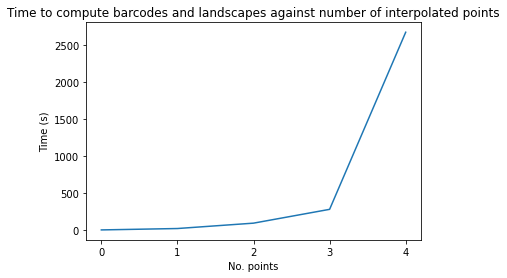

In [11]:
x_values = list(time_taken.keys())
y_values = list(time_taken.values())
plt.plot(x_values, y_values)
plt.xlabel("No. points")
plt.xticks(x_values)
plt.ylabel("Time (s)")
plt.title("Time to compute barcodes and landscapes against number of interpolated points")
plt.show()

In [6]:
l_inf_matrix = linf_distance_matrix(list(interpolated_landscapes.values()))
print(l_inf_matrix)

[[0.         0.54649615 0.54649615 0.6285243  0.6783824 ]
 [0.54649615 0.         0.31272745 0.39172173 0.30030203]
 [0.54649615 0.31272745 0.         0.16180563 0.21166372]
 [0.6285243  0.39172173 0.16180563 0.         0.11444378]
 [0.6783824  0.30030203 0.21166372 0.11444378 0.        ]]


In [7]:
lp_matrix = lp_distance_matrix(list(interpolated_landscapes.values()), 2)
print(lp_matrix)

[[0.         2.03643802 2.19341223 2.22685037 2.23331077]
 [2.03643802 0.         0.54366956 0.72255834 0.79531884]
 [2.19341223 0.54366956 0.         0.42183742 0.5359264 ]
 [2.22685037 0.72255834 0.42183742 0.         0.26518497]
 [2.23331077 0.79531884 0.5359264  0.26518497 0.        ]]


Can see that pairswise distance between lanscapes as number of interpolated points increases decreases most steeply for first few points. 